# Importing Kaggle Dataset, Data Loader, Exploratory Data Analysis (EDA)

## Set Up

In [1]:
import os
import json 
from pathlib import Path
from PIL import Image
import random
import shutil
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from collections import Counter

import pandas as pd
from collections import defaultdict

import shutil
from tqdm import tqdm

/Users/hannazelis/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download and Move the latest version of the "Pexels 110k 512p JPEG" Dataset

Dataset Link: https://www.kaggle.com/datasets/innominate817/pexels-110k-512p-min-jpg

In [2]:
#download latest version
downloaded_path = kagglehub.dataset_download("innominate817/pexels-110k-512p-min-jpg")
print("Path to dataset files:", downloaded_path)

#path to move downloaded dataset to
destination_path = './data'
os.makedirs(destination_path, exist_ok=True)

#move all files and folders inside the final version path
items = os.listdir(downloaded_path)
if items:
    for item in items:
        source = os.path.join(downloaded_path, item)
        destination = os.path.join(destination_path, item)
        if not os.path.exists(destination):
            shutil.move(source, destination)
            print(f"Moved: {item}")
        else:
            print(f"Skipping existing: {item}")
    
else:
    print("No files to mvoe inside the latest version folder")


Path to dataset files: /Users/hannazelis/.cache/kagglehub/datasets/innominate817/pexels-110k-512p-min-jpg/versions/4
No files to mvoe inside the latest version folder


## Dataset Loader
* Write the paths to all parts of the dataset (images, attributes, prompts, and tags)
    * Load image names
    * Read in attributes
    * Captions
    * Tags into memory

In [3]:
'''
Set up all of the paths to all of the different components of the dataset from Kaggle

pwd: ./data/pexels-110k-512p-min-jpg/
      | --> images/
      | --> attributes_df.json
      | --> pexels-prompts-pairs.json
      | --> tags.txt

Dataset structure and content:
pexels-110k-512p-min-jpg/
      | --> images/
        * 110k images in .jpg format
      | --> attributes_df.json
        * 110k images with their attributes
        * INSERT COLUMN NAMES HERE!!!!!!!!!!!!!!!!!
      | --> pexels-prompts-pairs.json
        * INSERT CONTEXT HERE!!!!!!!!!!!!!!!!!!!!!!
      | --> tags.txt
        * tag names for the 110k images
'''

#all of the paths to different parts of the data
images_path = './data/pexels-110k-512p-min-jpg/images'
attributes_path = './data/pexels-110k-512p-min-jpg/attributes_df.json'
prompts_path = './data/pexels-110k-512p-min-jpg/pexels-prompts-pairs.json'
tags_path = './data/pexels-110k-512p-min-jpg/tags.txt'



#load images
image_filenames = [f for f in os.listdir(images_path) if f.endswith('.jpg')]
print(f"Total images: {len(image_filenames)}")



#load prompt data
with open(prompts_path, 'r') as f:
    prompts_data = json.load(f)



#load attributes data
with open(attributes_path, 'r') as f:
    attributes_data = json.load(f)



#load tags data
with open(tags_path, 'r') as f:
    tags_data = f.read().splitlines()
print(f"Total tags: {len(tags_data)}")



#build up a dictionary for the prompts, connecting the image_id to the caption
imageid_to_caption = {}
for item in prompts_data:
    for img_id, caption in item.items():
        imageid_to_caption[img_id] = caption



#import image attributes data
attributes = pd.read_json(attributes_path)

#print the number of entries in the attributes data
print(f"Number of entries: {len(attributes)}")

#print the first few rows of the dataframe
attributes.head().transpose()

Total images: 109971
Total tags: 21242
Number of entries: 109971


3186010  \
title                        Pink and White Ice Cream Neon Signage   
aspect_ratio                                              0.749809   
main_color                                           [128, 38, 77]   
colors           [#000000, #a52a2a, #bc8f8f, #c71585, #d02090, ...   
tags             [bright, chocolate, close-up, cold, cream, cre...   
adult                                                very_unlikely   
aperture                                                       1.8   
camera                                                    iPhone X   
focal_length                                                   4.0   
google_place_id                        ChIJkUjxJ7it1y0R4qOVTbWHlR4   
iso                                                           40.0   
latitude                                                 -7.746914   
longitude                                               113.226906   
manufacturer                                                 Apple   
medical                                              very_unlikely   
orientation                                                    0.0   
racy                                                      unlikely   
shutter_speed                                                        
software                                                    13.1.3   
spoof                                                very_unlikely   
violence                                             very_unlikely   
location                 Kecamatan Mayangan, Jawa Timur, Indonesia   

                                                           3185509  \
title                         Garnishing of Syrup on a Cheesecake    
aspect_ratio                                                   1.0   
main_color                                         [185, 167, 164]   
colors               [#000000, #696969, #bc8f8f, #cd5c5c, #d3d3d3]   
tags             [cheesecake, dessert, epicure, food photograph...   
adult                                                very_unlikely   
aperture                                                       NaN   
camera                                                               
focal_length                                                   NaN   
google_place_id                                               None   
iso                                                            NaN   
latitude                                                       NaN   
longitude                                                      NaN   
manufacturer                                                         
medical                                              very_unlikely   
orientation                                                    NaN   
racy                                                      unlikely   
shutter_speed                                                        
software                                                             
spoof                                                very_unlikely   
violence                                             very_unlikely   
location                                                      None   

                                                           3182800  \
title                             People in Front of the Computers   
aspect_ratio                                              1.498501   
main_color                                         [176, 175, 169]   
colors               [#000000, #696969, #a9a9a9, #add8e6, #f5f5f5]   
tags             [colleagues, computer, connection, cooperation...   
adult                                                     unlikely   
aperture                                                       NaN   
camera                                                        None   
focal_length                                                   NaN   
google_place_id                                               None   
iso                                                            NaN 

## Exploratory Data Analysis (EDA)

* Visualize random images
* Image size stats



Image: 119405.jpg
Image ID: 119405
Caption: Body of Water during Golden Hour
Image Size: (768, 512)


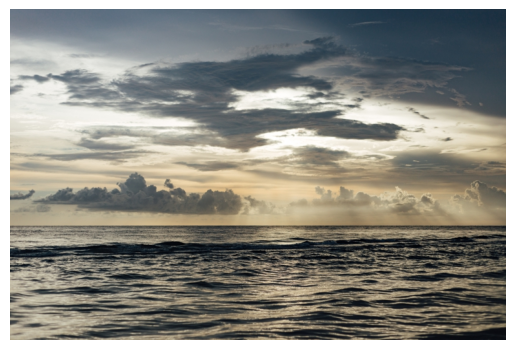



Image: bridge-footbridge-forest-1719995.jpg
Image ID: bridge-footbridge-forest-1719995
Caption: No caption found
Image Size: (512, 608)


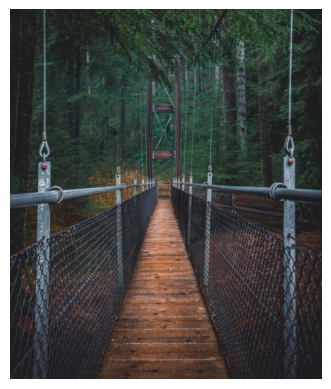



Image: black-and-white-black-and-white-feet-2769837.jpg
Image ID: black-and-white-black-and-white-feet-2769837
Caption: No caption found
Image Size: (512, 768)


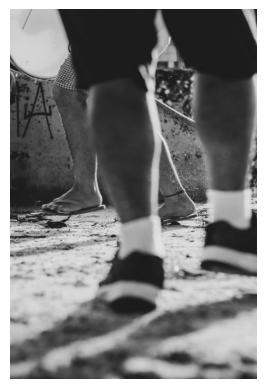



Image: blooming-blur-branch-1449462.jpg
Image ID: blooming-blur-branch-1449462
Caption: No caption found
Image Size: (768, 512)


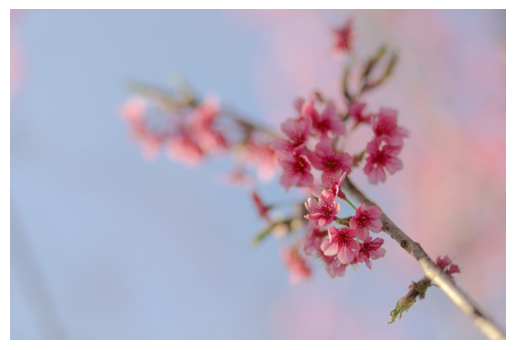



Image: automobile-automotive-bumper-2777436.jpg
Image ID: automobile-automotive-bumper-2777436
Caption: No caption found
Image Size: (512, 672)


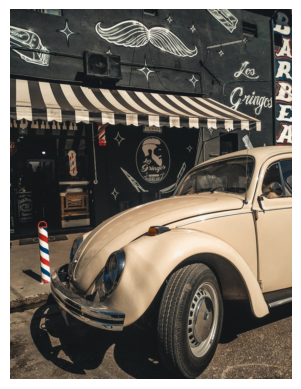

In [4]:
#look at random samples of images from the dataset
sample_images = random.sample(image_filenames, 5)

for img_file in sample_images:
    img_path = os.path.join(images_path, img_file)
    img = Image.open(img_path)
    #get image id and filename
    img_id = img_file.split('.')[0]

    #look up caption
    caption = imageid_to_caption.get(img_id, "No caption found")

    print("\n")
    print(f"Image: {img_file}")
    print(f"Image ID: {img_id}")
    print(f"Caption: {caption}")
    print(f"Image Size: {img.size}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

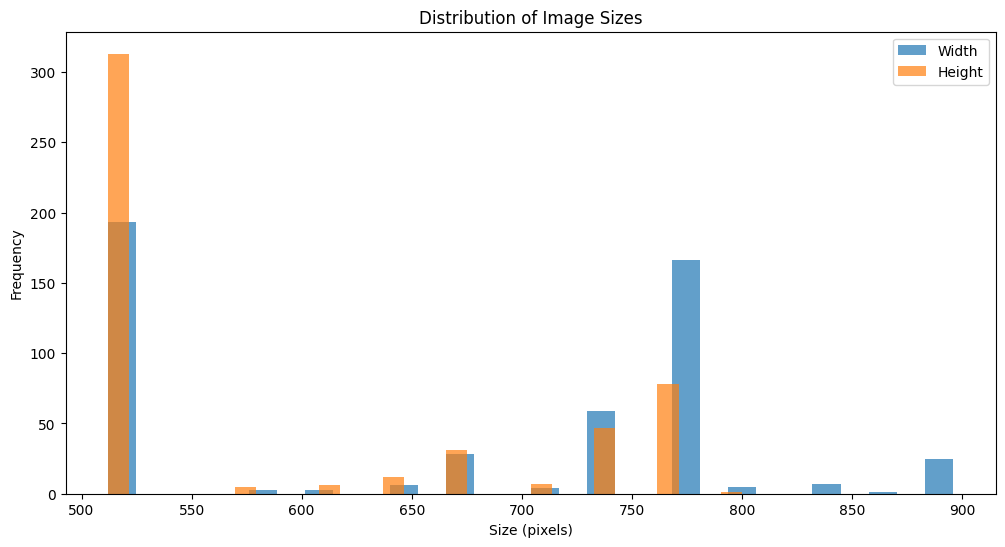

In [5]:
'''
EDA Plot: Distribution of Image Sizes
'''

#check the image sizes via plotting the distribution of the image sizes
sizes = []
for img_file in random.sample(image_filenames, 500):
    img_path = os.path.join(images_path, img_file)
    img = Image.open(img_path)
    sizes.append(img.size)

widths, heights = zip(*sizes)
plt.figure(figsize=(12, 6))
plt.hist(widths, bins=30, alpha=0.7, label='Width')
plt.hist(heights, bins=30, alpha=0.7, label='Height')
plt.legend()
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.title('Distribution of Image Sizes')
plt.show()

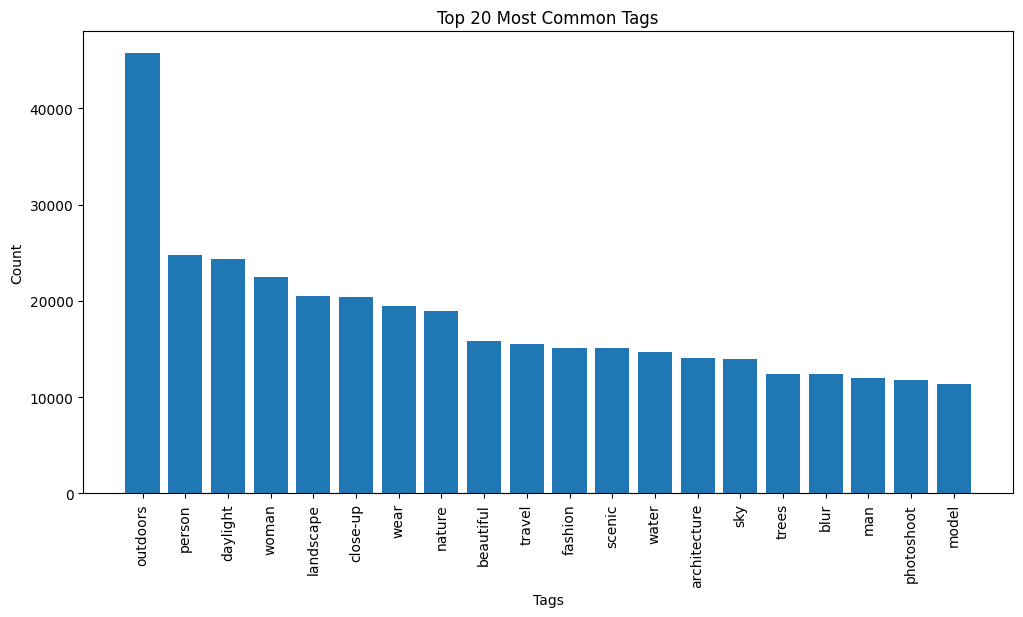

In [6]:
'''
EDA Plot: Top 20 Most Common Tags
'''

all_tags_data = []

for tags_list in attributes['tags'].dropna():
    all_tags_data.extend(tags_list)

tag_counts = Counter(all_tags_data)

#get the top 20 tags
most_common_tags = tag_counts.most_common(20)

tags, counts = zip(*most_common_tags)

plt.figure(figsize=(12, 6))
plt.bar(tags, counts)
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

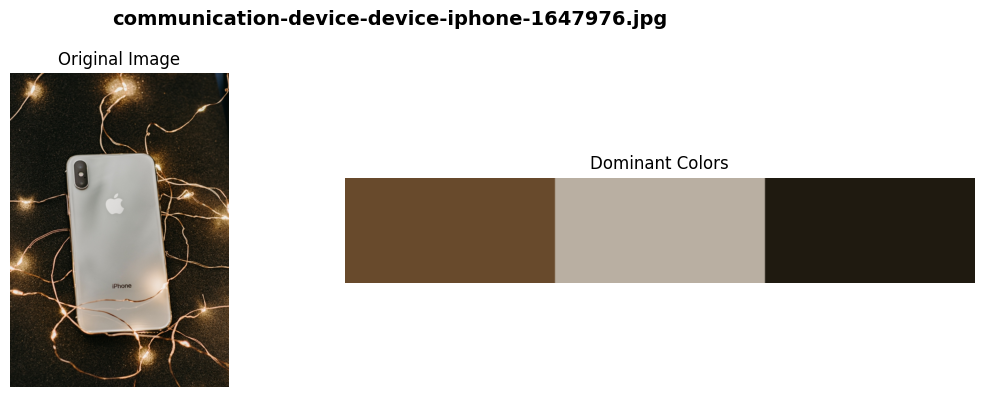

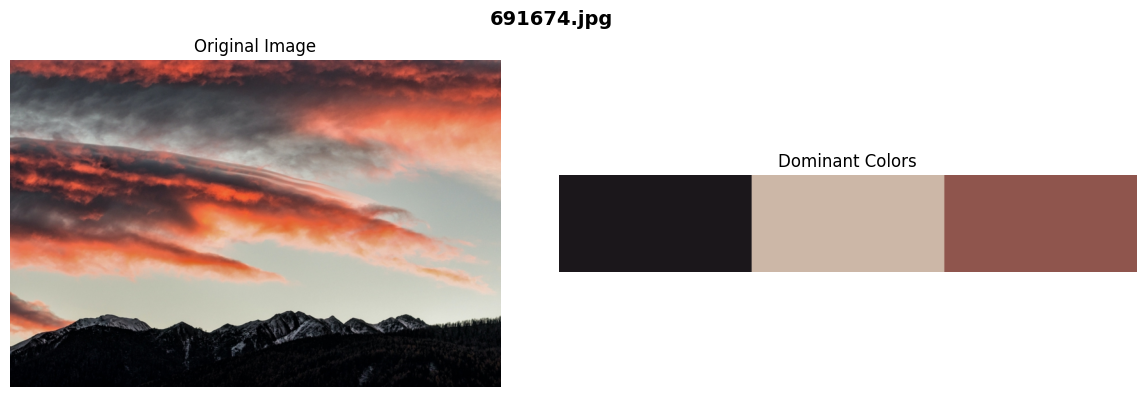

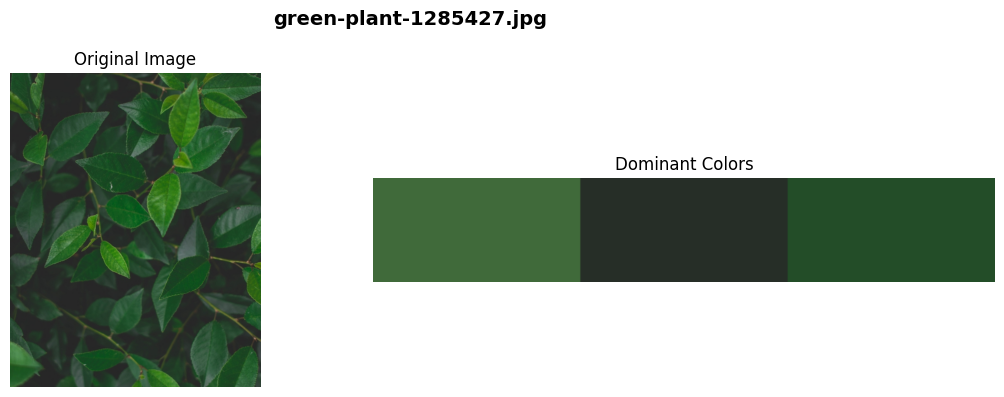

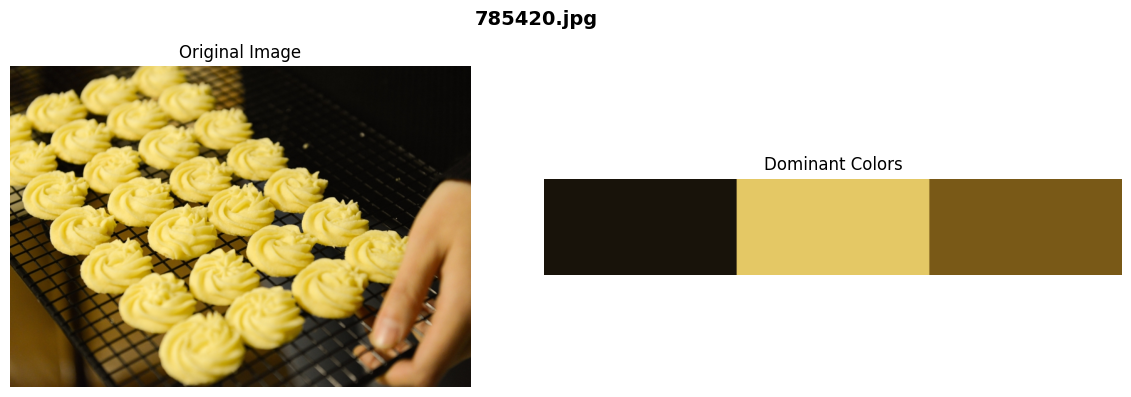

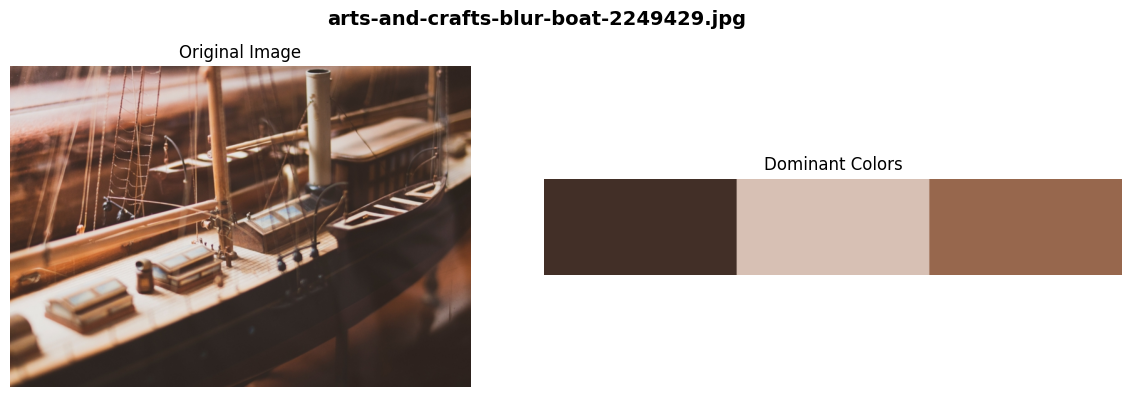

In [7]:
'''
EDA Plot: Dominant Colors in Random Images
'''

def get_main_color(img_path, k=3):
    #read the image from the path
    img = cv2.imread(img_path)

    #convert the image color space from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #reshape the image to a 2D array of pizels (rows = pixels, columns = RGB)
    img = img.reshape((-1, 3))

    #apply KMeans clustering to group pixels into k color clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(img)

    #obtain cluster centers (dominant colors)
    colors = kmeans.cluster_centers_.astype(int)

    #return the dominant colors
    return colors



#implement the function to get the dominant colors for 25 random images
for filename in random.sample(image_filenames, 5):
    img_path = os.path.join(images_path, filename)

    #get dominant colors from the image
    colors = get_main_color(img_path)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    #show original image
    img =Image.open(img_path)
    axs[0].imshow(img)
    axs[0].axis('off')
    axs[0].set_title('Original Image')

    #create an image filled with dominant colors stacked horizontally
    color_palette = np.zeros((50, 300, 3), dtype=np.uint8)

    step = color_palette.shape[1] // len(colors)
    for i, color in enumerate(colors):
        color_palette[:, i * step:(i + 1) * step] = color

    axs[1].imshow(color_palette)
    axs[1].axis('off')
    axs[1].set_title('Dominant Colors')

    #setup overall title
    fig.suptitle(filename, fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()


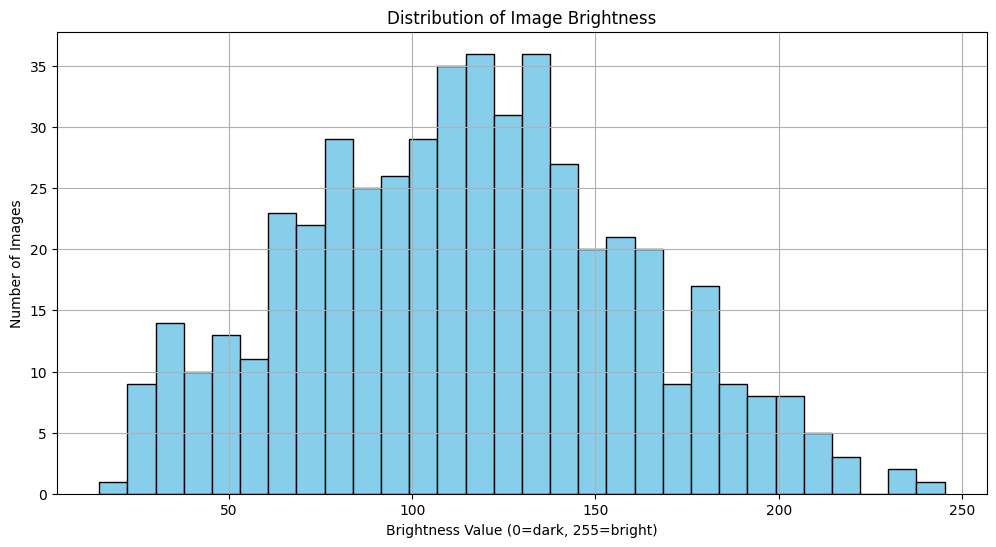

In [8]:
'''
EDA Plot: Brightness / Darknesss Histogram
'''
#store brightness values
brightness_values = []

#calculate brightness fora random sample of images
for filename in random.sample(image_filenames, 500):
    img_path = os.path.join(images_path, filename)
    #read the image
    img = cv2.imread(img_path)
    #convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #take average pixel intensity
    brightness = np.mean(gray)
    #append to the brightness values list
    brightness_values.append(brightness)



#plot the histogram of brightness values
plt.figure(figsize=(12, 6))
plt.hist(brightness_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Image Brightness")
plt.xlabel("Brightness Value (0=dark, 255=bright)")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

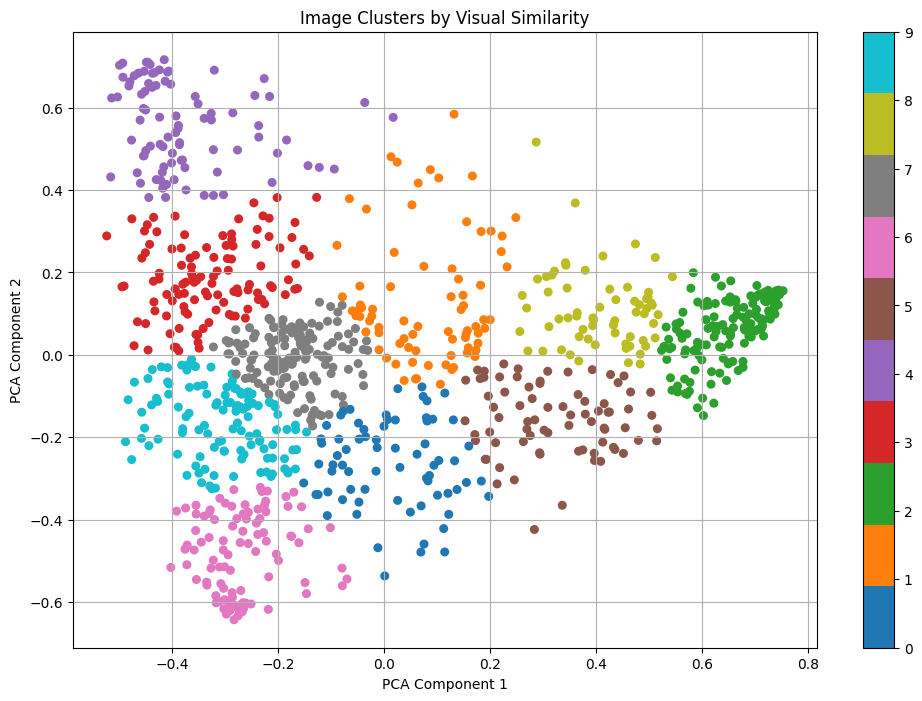

In [9]:
'''
EDA Plot: Cluster Images by Visual Similarity
'''

def extract_features(img_path):
    #read the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #resize to small for faster processing
    img = cv2.resize(img, (64, 64))
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

#extract features from a random sample of images
sample_files = random.sample(image_filenames, 1000)
features = []

for filename in sample_files:
    img_path = os.path.join(images_path, filename)
    feature = extract_features(img_path)
    features.append(feature)

features = np.array(features)

#dimensionality reduction: PCA to 2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

#clustering using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(features_pca)

#plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='tab10', s=30)
plt.title("Image Clusters by Visual Similarity")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.grid(True)
plt.show()

## Defining Keywords for List of Moods

In [10]:
#define mood keywords
mood_keywords = {
    "Cozy": ["cozy", "warm", "comfortable", "blanket", "fireplace", "pillow", "bed", "relax"],
    "Dreamy": ["dreamy", "fantasy"],
    "Romantic": ["romantic", "love", "passion"],
    "Minimalist": ["minimalist", "simple", "clean"],
    "Vibrant": ["vibrant", "colorful", "bright"],
    "Vintage": ["vintage", "old", "retro", "nostaglic"],
    "Natural": ["natural", "outdoors", "nature"],
    "Adventurous": ["adventurous", "explore", "travel"],
    "Mystical": ["mystical", "magical", "fantasy"],
}

#define color keywords
color_keywords = {
    "Pink": ["pink", "rose", "blush"],
    "Red": ["red", "crimson", "scarlet"],
    "Orange": ["orange", "tangerine", "peach"],
    "Yellow": ["yellow", "gold", "sunshine"],
    "Green": ["green", "emerald", "forest"],
    "Blue": ["blue", "azure", "navy"],
    "Purple": ["purple", "lavender", "violet"],
    "Brown": ["brown", "chocolate", "cocoa"],
    "Gray": ["gray", "silver", "charcoal"],
    "Black": ["black", "ebony", "jet"],
    "White": ["white", "ivory", "pearl"],
    "Beige": ["beige", "cream", "tan"],
    "Gold": ["gold", "glitter", "shiny"],
    "Silver": ["silver", "metallic", "shiny"],
    "Multicolor": ["multicolored", "colorful", "rainbow"]
}

## Python Script to Reduce Dataset from 110k to ~10K Images

In [11]:
#load the JSON file from the dataset
with open("data/pexels-110k-512p-min-jpg/attributes_df.json", "r") as f:
    attributes = json.load(f)

#flip outer and inner keys
flipped = {}
for field, image_dict in attributes.items():
    for image_id, value in image_dict.items():
        if image_id not in flipped:
            flipped[image_id] = {}
        flipped[image_id][field] = value

#convert to Dataframe
df = pd.DataFrame.from_dict(flipped, orient="index").reset_index()
df.rename(columns={"index": "image_id"}, inplace=True)

first_key = list(attributes.keys())[0]
print(f"First image ID: {first_key}")
print("Keys inside first image:", attributes[first_key].keys())

print("Columns:", df.columns.tolist())
print(df[['image_id', 'tags']].head())

#convert to list if needed
df['tags'] = df['tags'].apply(lambda x: x if isinstance(x, list) else[])


First image ID: title
Keys inside first image: dict_keys(['3186010', '3185509', '3182800', '3184308', '3185747', '3185751', '3184419', '3183136', '3184404', '3185495', '3185753', '3185490', '3185538', '3185482', '3183141', '3184289', '3184463', '3184455', '3184304', '3183143', '3184465', '3184464', '3184407', '3184656', '3183144', '3185746', '3184408', '3184461', '3184462', '3184468', '3184285', '3184435', '3183131', '3183135', '3184437', '3186325', '3183132', '3184165', '3184166', '3186321', '3184167', '3183130', '3184159', '3183194', '3182780', '3184657', '3183824', '3184642', '3184161', '3184168', '3184313', '3182793', '3183199', '3184426', '3184307', '3183184', '3184645', '3184309', '3184481', '3182530', '3183187', '3182782', '3184641', '3183163', '3183164', '3184658', '3184639', '3185041', '3182783', '3182781', '3183176', '3184960', '3183190', '3182778', '3182799', '3183186', '3184663', '3184660', '3184731', '3184664', '3183125', '3182797', '3183188', '3183156', '3183183', '318319

In [12]:
def match_keywords(tag_list, keywords):
    return any(kw in tag_list for kw in keywords)

#filter by mood
filtered_data = defaultdict(list)

for mood, mood_words in mood_keywords.items():
    for color, color_words in color_keywords.items():
        subset = df[df['tags'].apply(
            lambda tags: match_keywords(tags, mood_words) and match_keywords(tags, color_words)
        )]

        #adjust sample side if needed
        sampled = subset.sample(n=min(500, len(subset)), random_state=42)
        sampled["mood"] = mood
        sampled["color_theme"] = color
        filtered_data[f"{mood}_{color}"] = sampled

#combine all filtered data into one dataset
final_df = pd.concat(filtered_data.values(), ignore_index=True)

#preview
print("Final filtered dataset shape:", final_df.shape)
print(final_df[['image_id', 'mood', 'color_theme', 'tags']].head())

#save to CSV
final_df.to_csv("data/filtered_mood_color_dataset.csv", index=False)

Final filtered dataset shape: (11745, 25)
  image_id  mood color_theme  \
0   565996  Cozy        Pink   
1  2261128  Cozy        Pink   
2   763148  Cozy        Pink   
3  2857583  Cozy        Pink   
4   193034  Cozy        Pink   

                                                tags  
0  [adults, beautiful, blue, body, females, float...  
1  [beautiful, beauty, bloom, blooming, blossom, ...  
2  [bed, bedroom, bedroom background, bedroom wal...  
3  [armchair, beverage, caffeine, chair, coffee, ...  
4  [aroma, beverage, breakfast, café, caffeine, c...  


## Copy Matching Image Files

In [13]:
image_root = "data/pexels-110k-512p-min-jpg/images"
output_root = "data/filtered_images"

#loop with full rows to get mood & color
for _, row in tqdm(final_df.iterrows(), total=len(final_df)):
    image_id = str(row['image_id'])
    mood = row['mood']
    color = row['color_theme']

    #construct source path
    src = os.path.join(image_root, f"{image_id}.jpg")

    #construction destination path
    dst_dir = os.path.join(output_root, mood, color)
    dst = os.path.join(dst_dir, f"{image_id}.jpg")

    #create destination folder if it doesn't exist
    os.makedirs(dst_dir, exist_ok=True)

    #only copy if source file exists
    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"Source file not found: {src}")

  4%|▎         | 440/11745 [00:00<00:04, 2278.86it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/2261128.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2857583.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/696179.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1046639.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1059054.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1057190.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1045040.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2726986.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/949273.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2686392.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1558916.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1435511.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2261128.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/172456

 10%|▉         | 1120/11745 [00:00<00:03, 3000.69it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1028710.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1160500.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/965995.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2851064.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1453808.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2814198.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1377454.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1534624.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1762812.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1021075.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1021068.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1299148.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1076429.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/16597

 15%|█▍        | 1718/11745 [00:00<00:03, 2883.04it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/2217366.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1064760.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1233280.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/926971.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1118439.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2889541.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2820119.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1149347.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1191318.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1038289.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1150988.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2879819.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1988681.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/14361

 20%|█▉        | 2295/11745 [00:00<00:03, 2829.46it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1838596.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1400171.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1421812.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1076503.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1060876.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2094135.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2247211.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1132047.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2563244.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1423014.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1550443.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/937783.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1123764.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/22653

 26%|██▌       | 3063/11745 [00:01<00:02, 3358.26it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1136155.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2929227.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2283494.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1883932.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3060703.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1407256.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1432006.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1108572.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1002797.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1047968.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/347138.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1603463.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1036574.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/10775

 29%|██▉       | 3400/11745 [00:01<00:02, 3171.32it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1234937.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1307094.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/985266.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1077570.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1101260.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1373841.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2132728.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1120601.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2517443.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1373753.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1379810.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1025324.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1116945.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/18834

 36%|███▋      | 4263/11745 [00:01<00:02, 3705.80it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/3029730.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1749691.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3004666.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1502418.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1340382.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1209843.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2537112.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2660837.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1782120.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2839409.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1182252.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2343563.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2158554.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1068

 43%|████▎     | 5021/11745 [00:01<00:01, 3565.45it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/2273476.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1085966.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2442888.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2158428.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1497307.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2273477.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2772147.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2273262.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1879065.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2456423.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2923034.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2273499.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1089425.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1337

 50%|█████     | 5882/11745 [00:01<00:01, 3956.70it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/2984588.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1980982.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1129238.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1396027.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1486844.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2536576.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2586854.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/544985.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1058509.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1073121.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1123756.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2480232.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2598721.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/29041

 57%|█████▋    | 6734/11745 [00:01<00:01, 4089.27it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1907082.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2533088.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2909258.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/949674.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1260748.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1469196.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1276524.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2911345.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1299148.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/949679.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1309072.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1838860.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1571734.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/275261

 64%|██████▍   | 7534/11745 [00:02<00:01, 3737.11it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/2086264.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2330966.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1656701.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1006374.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1461033.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2022793.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2452379.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2388571.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1565263.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1484272.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2598762.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2036562.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1633339.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2973

 71%|███████   | 8287/11745 [00:02<00:00, 3639.87it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1493211.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1313258.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1123844.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2508873.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2890794.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2465372.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2661176.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1046495.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1699209.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1238380.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2238318.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1039110.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2738052.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1107

 77%|███████▋  | 9011/11745 [00:02<00:00, 3397.44it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1710485.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/992829.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2859251.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1805404.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1843768.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1181820.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2408315.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2748757.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1837899.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2418667.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1435632.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2108514.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2414831.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/13278

 84%|████████▍ | 9915/11745 [00:02<00:00, 3975.87it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/2339287.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1603076.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2672679.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3007436.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1273431.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1496378.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1585893.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1546585.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3007437.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2905418.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2057007.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/986828.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2908929.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/16937

 88%|████████▊ | 10317/11745 [00:02<00:00, 3526.27it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1203768.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/273786.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1786847.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2819546.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2893686.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1121477.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1786845.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2961929.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2994323.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2881349.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1058280.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3048526.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2860898.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/12087

 94%|█████████▍| 11039/11745 [00:03<00:00, 3466.54it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/1248437.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1092193.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1008566.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/991390.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2661921.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2650387.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2162119.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1333396.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2734519.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2518849.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2462384.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2215647.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3049325.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/24054

100%|██████████| 11745/11745 [00:03<00:00, 3549.02it/s]

Source file not found: data/pexels-110k-512p-min-jpg/images/2536630.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2127031.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3038291.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1082653.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3007436.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2127732.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/3007437.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2127022.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1743555.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1410010.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2377894.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1919209.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/1002695.jpg
Source file not found: data/pexels-110k-512p-min-jpg/images/2909

# Next Steps    
1. Build a Model for Image Generation
    * CVAE Model Building

2. Prepare for Model Training
    * Start with splitting CSV into train, val, test
    * Normalize images (resize, pixel scaling)
    * Build dataset class (PyTorch/TensorFlow)

3. Train + Evaluate Your Model
    * Encode the mood/color as conditional input
    * Train with reconstruction/loss metrics
    * Evaluate generation quality by conditioning on "Romantic + Red" OR "Dreamy + Blue", etc.

4. GUI (extra credit)
    * Other ideas: 
        * Latent space interpolation (for "aesthetic transitions")
        * GUI for mood/color dropdown
        * Export generated image gallery

5. Visualization (optional)
    * Latent space exploration or decoding


# HANNA'S NEXT STEPS AS OF Friday, May 2:
1. Build CVAE Model (code your conditional VAE architecture)
2. Train the Model (feed images + labels (moods/tags) into CVAE)
3. Sample / Generate (pick a mood --> generate matching images)
4. GUI (build dropdown GUI for mood selection, color selection, and a slider for brightness, saturation, and other picture features) 



"""#shuffle and split
train_df = final_df.sample(frac=0.8, random_state=1)
val_test_df = final_df.drop(train_df.index)

val_df = val_test_df.sample(frac=0.5, random_state=2)
test_df = val_test_df.drop(val_df.index)

#save
train_df.to_csv("train_mood_filtered.csv", index=False)
val_df.to_csv("train_mood_filtered.csv", index=False)
test_df.to_csv("train_mood_filtered.csv", index=False)"""